In [2]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px


In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
data =pd.read_csv("/content/drive/MyDrive/proyecto rojo/input/diabetes.csv")
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

### LEER ARCHIVO Y REVISAR DESCRIPCION

In [6]:
# data=pd.read_csv('input/diabetes.csv')
# data.head()

In [8]:
nr, nc = data.shape
print (f"There are {nr} rows and {nc} columns")

There are 768 rows and 9 columns


In [9]:
data.size
print (f"There are {data.size} atributes in data")

There are 6912 atributes in data


In [10]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
num_columns = data._get_numeric_data().columns

In [12]:
num_columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [13]:
data.select_dtypes(include=['object']).columns.tolist()

[]

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [15]:
data.describe().round(2).style.background_gradient()

In [16]:
data["Outcome"]

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


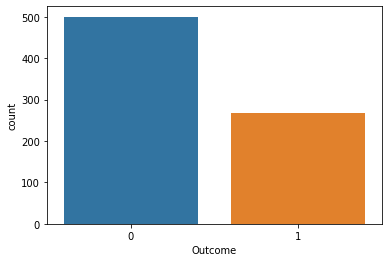

In [17]:
from itertools import cycle
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

sns.countplot(data['Outcome'])
plt.show()

In [18]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<b> Detect minimum and maximun values for columns </b>

In [19]:
for col in data.columns:
    print("The minimum value fore the columns {} is {} and the maximun value is {}"
          .format(col, data[col].min(), data[col].max()))


The minimum value fore the columns Pregnancies is 0 and the maximun value is 17
The minimum value fore the columns Glucose is 0 and the maximun value is 199
The minimum value fore the columns BloodPressure is 0 and the maximun value is 122
The minimum value fore the columns SkinThickness is 0 and the maximun value is 99
The minimum value fore the columns Insulin is 0 and the maximun value is 846
The minimum value fore the columns BMI is 0.0 and the maximun value is 67.1
The minimum value fore the columns DiabetesPedigreeFunction is 0.078 and the maximun value is 2.42
The minimum value fore the columns Age is 21 and the maximun value is 81
The minimum value fore the columns Outcome is 0 and the maximun value is 1


 <ul>
    <li>  Presion sanguinea no puede ser 0</li>
    <li>  Glucosa no puede ser 0</li>
    <li> SkinThickness no puede ser 0</li>
    <li> Insulin no puede ser 0</li>
    <li> BMI no puede ser 0 </li>
    
  </ul>
  <b>consulta <a> https://fmdiabetes.org/automonitoreo-niveles-glucosa/ </a><b/>

In [20]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [21]:
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)

In [22]:
diabetes_dataset = data[(data.BloodPressure != 0) & (data.BMI != 0) & (data.Glucose != 0)]

In [23]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [24]:
data['Insulin'] = data['Insulin'].fillna(data['Insulin'].median()) # 
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']:
    data[col] = data[col].fillna(data[col].mean())

In [25]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### detect  outliers in data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

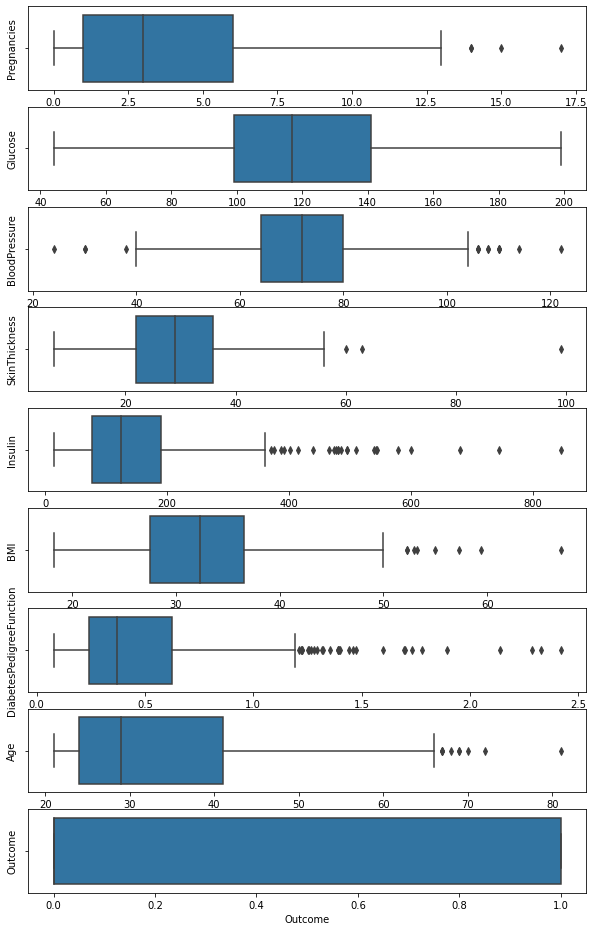

In [26]:
plt.figure(figsize=(10,20))
for i,col in enumerate(num_columns,1):
     plt.subplot(11,1,i)
     sns.boxplot(diabetes_dataset[col])
     plt.ylabel(col)
plt.show()

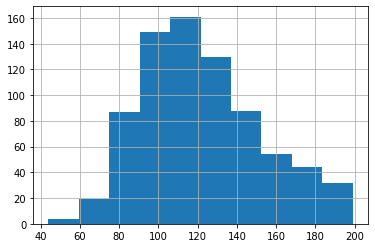

In [27]:
data['Glucose'].hist()

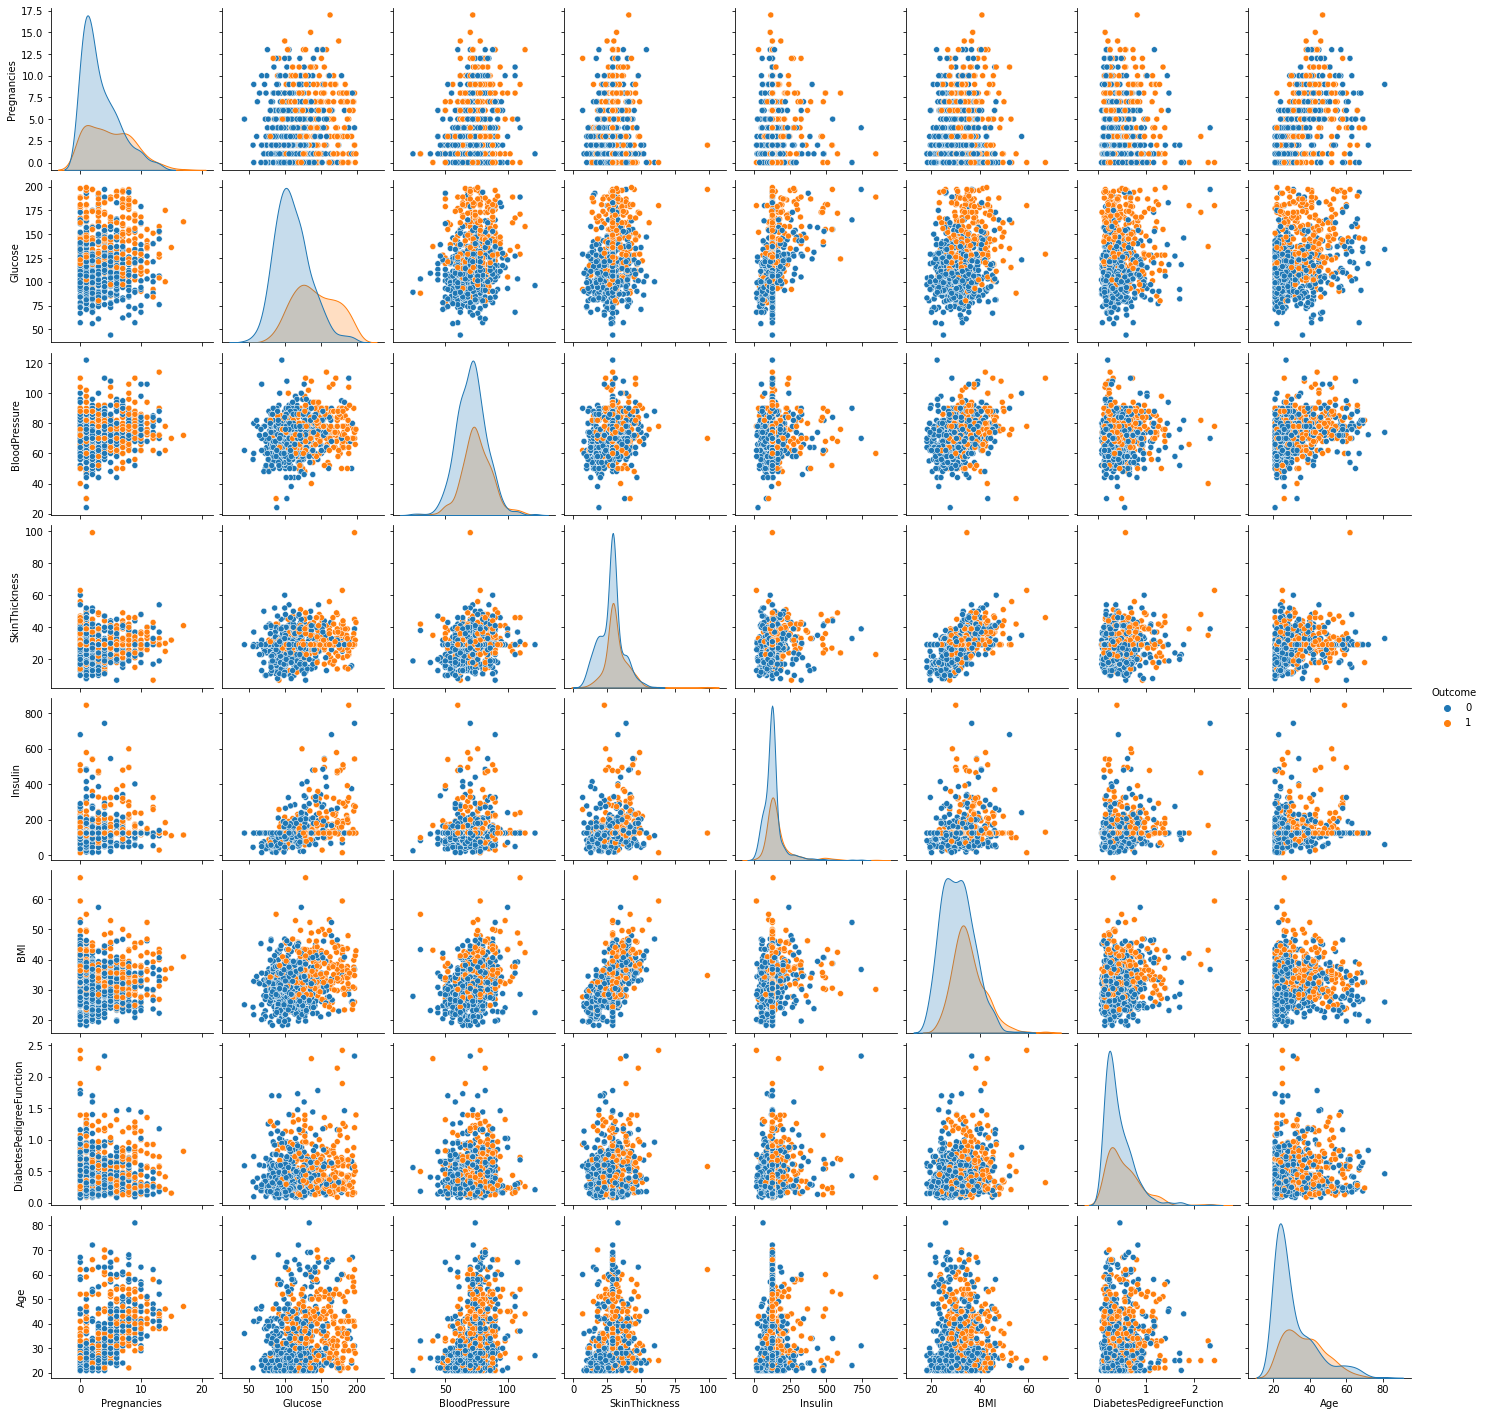

In [28]:
sns.pairplot(data,hue='Outcome')

In [29]:
from scipy.stats import iqr

In [30]:
glucose_iqr_diabetes_n = iqr(data[(data['Outcome']==0) & (data['Glucose']!=0)]['Glucose'],rng=(25,75))

glucose_iqr_diabetes_y = iqr(data[(data['Outcome']==1) & (data['Glucose']!=0)]['Glucose'],rng=(25,75))

In [31]:
print ("intercuantil para glucosas sin diabetes {} y con diabates {}".format(glucose_iqr_diabetes_n,glucose_iqr_diabetes_y))

intercuantil para glucosas sin diabetes 32.0 y con diabates 48.0


In [34]:
Insulin_iqr_diabetes_n = iqr(data[(data['Outcome']==0) & (data['Insulin']!=0)]['Insulin'],rng=(25,75))

Insulin_iqr_diabetes_y = iqr(data[(data['Outcome']==1) & (data['Insulin']!=0)]['Insulin'],rng=(25,75))

In [35]:
print ("intercuantil para valores de insulina sin diabetes {} y con diabates {}".format(Insulin_iqr_diabetes_n,Insulin_iqr_diabetes_y))

intercuantil para valores de insulina sin diabetes 30.0 y con diabates 42.25


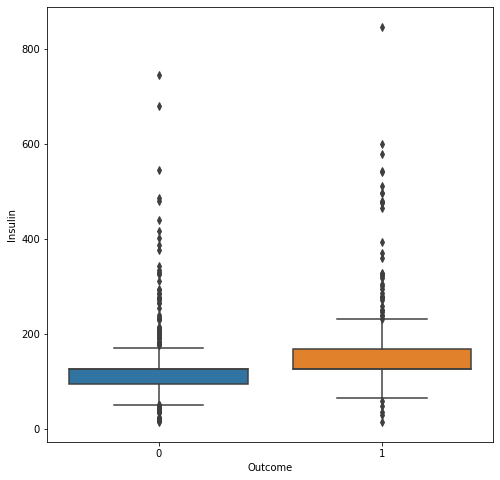

In [36]:
plt.figure(figsize=(8,8))
sns.boxplot(x='Outcome',y='Insulin',data=data)

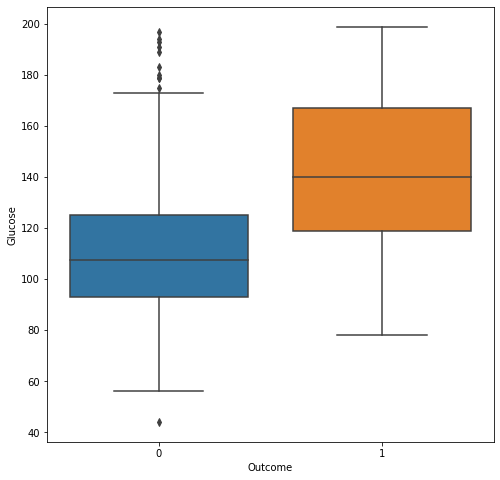

In [37]:
plt.figure(figsize=(8,8))
sns.boxplot(x='Outcome',y='Glucose',data=data)

In [39]:
def Glucose_category(glucose):

    if glucose < 120:
        return 1
    else:
        return 2
   

In [40]:
def BloodPressure_category(blood):

    if blood < 62:
        return 1
    elif blood < 80:
        return 2
    elif blood >= 80:
        return 3

In [41]:
data['Glucose_category']  = data["Glucose"].apply(Glucose_category)

In [42]:
data['BloodPressure_category']  = data["BloodPressure"].apply(BloodPressure_category)

In [38]:
my_tab = pd.crosstab(data["Glucose_category"],  # Make a crosstab
                     data.Outcome,
                     margins=True, 
                     margins_name="Total")    

KeyError: ignored

In [30]:
my_tab_2 = pd.crosstab(data["BloodPressure_category"],  # Make a crosstab
                     data.Outcome,
                     margins=True, 
                     margins_name="Total")    

In [31]:
my_tab_2

Outcome                   0    1  Total
BloodPressure_category                 
1                       101   23    124
2                       284  155    439
3                       115   90    205
Total                   500  268    768

In [32]:
my_tab

Outcome             0    1  Total
Glucose_category                 
1                 335   68    403
2                 165  200    365
Total             500  268    768

In [43]:
data.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
Glucose_category              int64
BloodPressure_category        int64
dtype: object

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
 9   Glucose_category          768 non-null    int64  
 10  BloodPressure_category    768 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 66.1 KB


In [45]:
data.duplicated().sum()

0

## EDA

### Correlation

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


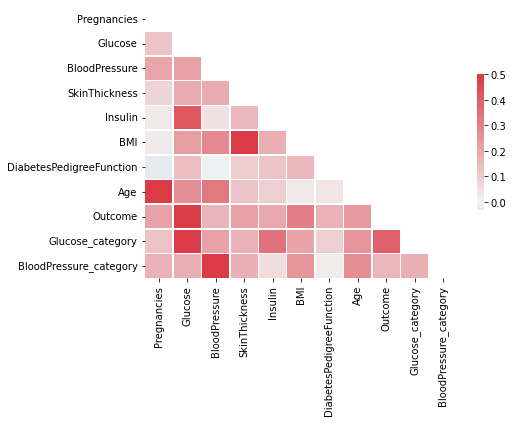

In [46]:
corr=data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(7, 5))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0, linewidths=.5, cbar_kws={"shrink": .5})

In [47]:
lis=["don't have diabetes","have diabetes"]
have_or_not = data["Outcome"].value_counts().tolist()
values = [have_or_not[0], have_or_not[1]]
fig = px.pie(values=data['Outcome'].value_counts(), names=lis , width=800, height=400, color_discrete_sequence=["skyblue","black"]
             ,title="percentage between have diabetes or not")
fig.show()

# Feature selection

### Test 1 

Univariate Selection
---



In [48]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split



In [49]:
!pip install mlxtend==0.21.0
!pip install joblib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 40.6 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [50]:
import joblib

In [51]:
!pip freeze

absl-py==1.3.0
aeppl==0.0.33
aesara==2.7.9
aiohttp==3.8.3
aiosignal==1.3.1
alabaster==0.7.12
albumentations==1.2.1
altair==4.2.0
appdirs==1.4.4
arviz==0.12.1
astor==0.8.1
astropy==4.3.1
astunparse==1.6.3
async-timeout==4.0.2
asynctest==0.13.0
atari-py==0.2.9
atomicwrites==1.4.1
attrs==22.1.0
audioread==3.0.0
autograd==1.5
Babel==2.11.0
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==5.0.1
blis==0.7.9
bokeh==2.3.3
branca==0.6.0
bs4==0.0.1
CacheControl==0.12.11
cached-property==1.5.2
cachetools==5.2.0
catalogue==2.0.8
certifi==2022.9.24
cffi==1.15.1
cftime==1.6.2
chardet==3.0.4
charset-normalizer==2.1.1
click==7.1.2
clikit==0.6.2
cloudpickle==1.5.0
cmake==3.22.6
cmdstanpy==1.0.8
colorcet==3.0.1
colorlover==0.3.0
community==1.0.0b1
confection==0.0.3
cons==0.4.5
contextlib2==0.5.5
convertdate==2.4.0
crashtest==0.3.1
crcmod==1.7
cufflinks==0.17.3
cvxopt==1.3.0
cvxpy==1.2.2
cycler==0.11.0
cymem==2.0.7
Cython==0.29.32
daft==0.0.4
dask==2022.2.0
datascience==0.17.5
db-dtypes==1.0.4
debugpy==1.0.

In [52]:
# importing the models

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

In [53]:
x = data.drop(['Outcome'] , axis = 1)
y = data['Outcome' ]
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size= 0.2 , random_state=5)

In [54]:
x_train

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
140            3    128.0           78.0       29.15342    125.0  21.1   
358           12     88.0           74.0       40.00000     54.0  35.3   
143           10    108.0           66.0       29.15342    125.0  32.4   
674            8     91.0           82.0       29.15342    125.0  35.6   
121            6    111.0           64.0       39.00000    125.0  34.2   
..           ...      ...            ...            ...      ...   ...   
73             4    129.0           86.0       20.00000    270.0  35.1   
400            4     95.0           64.0       29.15342    125.0  32.0   
118            4     97.0           60.0       23.00000    125.0  28.2   
701            6    125.0           78.0       31.00000    125.0  27.6   
206            8    196.0           76.0       29.00000    280.0  37.5   

     DiabetesPedigreeFunction  Age  Glucose_category  BloodPressure_category  
140                     0.268   55                 2                       2  
358                     0.378   48                 1                       2  
143                     0.272   42                 1                       2  
674                     0.587   68                 1                       3  
121                     0.260   24                 1                       2  
..                        ...  ...               ...                     ...  
73                      0.231   23                 2                       3  
400                     0.161   31                 1                       2  
118                     0.443   22                 1                       1  
701                     0.565   49                 2                       2  
206                     0.605   57                 2                       2  

[614 rows x 10 columns]

In [55]:
selector = SelectKBest(f_classif, k=3)
selector.fit(x_train, y_train)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()

In [56]:
scores.max()

1.0

In [57]:
x.shape[-1]

10

In [58]:
print("Score List:",scores)
print("Feature list", x_train.columns)

Score List: [0.24636841 1.         0.0985046  0.18689397 0.19338647 0.33549587
 0.14330579 0.28704094 0.59754175 0.11229575]
Feature list Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Glucose_category',
       'BloodPressure_category'],
      dtype='object')


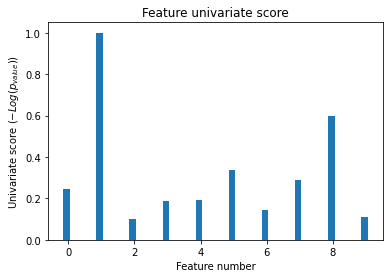

In [59]:

X_indices = np.arange(x.shape[-1])
plt.figure(1)
plt.clf()
plt.bar(X_indices - 0.05, scores, width=0.2)
plt.title("Feature univariate score")
plt.xlabel("Feature number")
plt.ylabel(r"Univariate score ($-Log(p_{value})$)")
plt.show()

In [60]:
print("Score List:",scores)
print("Feature list", x_train.columns)

Score List: [0.24636841 1.         0.0985046  0.18689397 0.19338647 0.33549587
 0.14330579 0.28704094 0.59754175 0.11229575]
Feature list Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Glucose_category',
       'BloodPressure_category'],
      dtype='object')


In [71]:
#calling the linear regression model
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
sfs1 = sfs(lreg, k_features=3, forward=True, verbose=2, scoring='neg_mean_squared_error')

In [73]:
sfs1 = sfs1.fit(x, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished

[2022-11-10 23:49:20] Features: 1/3 -- score: -0.17311495646464525[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2022-11-10 23:49:21] Features: 2/3 -- score: -0.1638895068318647[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished

[2022-11-10 23:49:21] Features: 3/3 -- score: -0.158139512142081

In [69]:
feat_names = list(sfs1.k_feature_names_)
print(feat_names)

['Pregnancies', 'Glucose', 'BMI']


#Other

In [ ]:
data["Outcome"]

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [ ]:
plt.figure(figsize=(4,4))

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

In [ ]:
fig = px.bar(data['Age'].value_counts(), height=400, width = 700) 
fig.show()

In [ ]:
#data.plot(subplots =True, kind = 'box', layout = (4,5), figsize = (20,17), color = 'DarkRed')
#plt.subplots_adjust(wspace = 0.3, hspace= 0.3)

/home/chriferob/desarrollo/dev_iaml/ml_env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Glucose', ylabel='Density'>

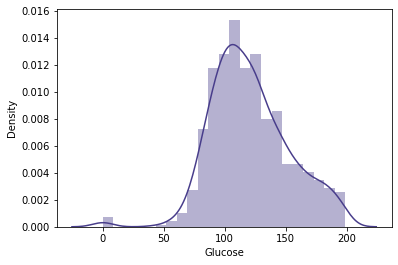

In [ ]:
sns.distplot(data['Glucose'],color ="DarkSlateBlue" )

/home/chriferob/desarrollo/dev_iaml/ml_env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='BloodPressure', ylabel='Density'>

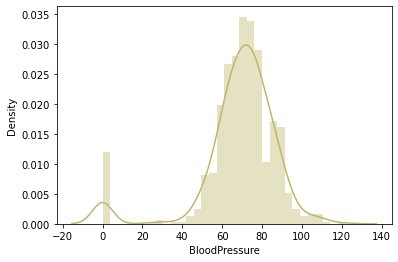

In [ ]:
sns.distplot(data['BloodPressure'], color = 'DarkKhaki')

/home/chriferob/desarrollo/dev_iaml/ml_env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Insulin', ylabel='Density'>

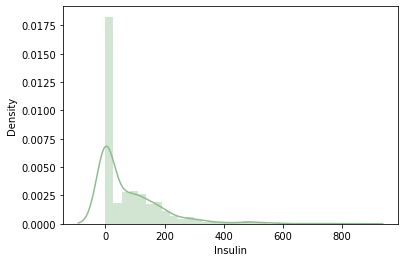

In [ ]:
sns.distplot(data['Insulin'],color ="DarkSeaGreen" )

### Split Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = data.drop(['Outcome'] , axis = 1).values
y = data['Outcome' ].values
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size= 0.2 , random_state=42)

### Scale data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(x_train)

MinMaxScaler()

In [ ]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [71]:
r, c = x_train.shape
r2 ,c2 = x_test.shape
print (f"x_train = {r} and y_train = {y_train.shape} ")
print (f"x_test = {r2} and y_test = {y_test.shape} ")

x_train = 614 and y_train = (614,) 
x_test = 154 and y_test = (154,) 


In [74]:
import matplotlib.pyplot as plt

X_indices = np.arange(X.shape[-1])
plt.figure(1)
plt.clf()
plt.bar(X_indices - 0.05, scores, width=0.2)
plt.title("Feature univariate score")
plt.xlabel("Feature number")
plt.ylabel(r"Univariate score ($-Log(p_{value})$)")
plt.show()

NameError: ignored

### Create Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.optimizers import Adam

2022-11-02 21:33:13.361227: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-02 21:33:13.665338: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-02 21:33:13.728763: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-02 21:33:13.728776: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [ ]:
model = Sequential()

2022-11-02 21:33:15.191554: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-02 21:33:15.191786: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-02 21:33:15.191802: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (chriferob-ThinkPad-E15-Gen-2): /proc/driver/nvidia/version does not exist
2022-11-02 21:33:15.192377: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:

model.add(Dense(20,activation='relu'))

model.add(Dense(20,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [ ]:
model.fit(x_train, y_train,batch_size=10,epochs=200)

Epoch 1/200
62/62 [==============================] - 0s 925us/step - loss: 0.6739 - accuracy: 0.6531
Epoch 2/200
62/62 [==============================] - 0s 1ms/step - loss: 0.6566 - accuracy: 0.6531
Epoch 3/200
62/62 [==============================] - 0s 1ms/step - loss: 0.6473 - accuracy: 0.6531
Epoch 4/200
62/62 [==============================] - 0s 979us/step - loss: 0.6334 - accuracy: 0.6531
Epoch 5/200
62/62 [==============================] - 0s 844us/step - loss: 0.6198 - accuracy: 0.6547
Epoch 6/200
62/62 [==============================] - 0s 1ms/step - loss: 0.6026 - accuracy: 0.6629
Epoch 7/200
62/62 [==============================] - 0s 865us/step - loss: 0.5857 - accuracy: 0.6938
Epoch 8/200
62/62 [==============================] - 0s 873us/step - loss: 0.5664 - accuracy: 0.7117
Epoch 9/200
62/62 [==============================] - 0s 921us/step - loss: 0.5561 - accuracy: 0.7068
Epoch 10/200
62/62 [==============================] - 0s 906us/step - loss: 0.5409 - accuracy: 0.

62/62 [==============================] - 0s 954us/step - loss: 0.4037 - accuracy: 0.8078
Epoch 162/200
62/62 [==============================] - 0s 988us/step - loss: 0.4000 - accuracy: 0.8160
Epoch 163/200
62/62 [==============================] - 0s 1ms/step - loss: 0.4011 - accuracy: 0.7980
Epoch 164/200
62/62 [==============================] - 0s 1ms/step - loss: 0.4050 - accuracy: 0.8062
Epoch 165/200
62/62 [==============================] - 0s 966us/step - loss: 0.3982 - accuracy: 0.8094
Epoch 166/200
62/62 [==============================] - 0s 801us/step - loss: 0.4008 - accuracy: 0.8143
Epoch 167/200
62/62 [==============================] - 0s 861us/step - loss: 0.3997 - accuracy: 0.8176
Epoch 168/200
62/62 [==============================] - 0s 897us/step - loss: 0.3999 - accuracy: 0.8094
Epoch 169/200
62/62 [==============================] - 0s 835us/step - loss: 0.3977 - accuracy: 0.8111
Epoch 170/200
62/62 [==============================] - 0s 890us/step - loss: 0.3964 - accur

<AxesSubplot:>

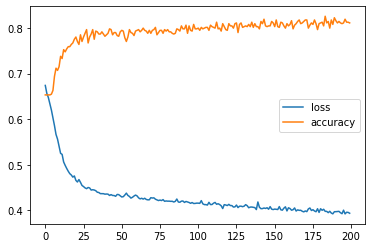

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
prediction = model.predict(x_test)
prediction  = [1 if y>=0.5 else 0 for y in prediction] 


5/5 [==============================] - 0s 1ms/step


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        99
           1       0.76      0.56      0.65        55

    accuracy                           0.78       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.78      0.78      0.77       154



In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
mean_abs_error=mean_absolute_error(prediction,y_test)
mean_abs_error

0.22077922077922077

In [ ]:
np.sqrt(mean_squared_error(y_test,prediction))

0.4698714938993648

In [ ]:
model.evaluate(x_test,y_test)

5/5 [==============================] - 0s 1ms/step - loss: 0.5311 - accuracy: 0.7792


[0.531121551990509, 0.7792207598686218]